<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/010_Fina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [3]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from joblib import Parallel, delayed
import joblib
  

def save_model(model,model_name):
 joblib.dump(model, model_name)
  
def load_model(model_name):
  return joblib.load(model_name)



In [5]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [6]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [8]:

set(list(dataset[target]))

{0, 1}

In [9]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [10]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
new_dataset=balance(X_train,y_train)

X_train = new_dataset.loc[:, new_dataset.columns!=target]
y_train = new_dataset[target]

#Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = load_model("/content/drive/MyDrive/MLModel_NREM_REM/RandomForestClassifier(max_depth=39, n_estimators=450, random_state=0)")


In [13]:
y_pred_train=rf.predict(X_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [ 1121 57050]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     58171
           1       1.00      0.98      0.99     58171

    accuracy                           0.99    116342
   macro avg       0.99      0.99      0.99    116342
weighted avg       0.99      0.99      0.99    116342

Accurecy:  0.9903646146705403


In [14]:
y_pred_test=rf.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[13664   796]
 [  533  2827]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14460
           1       0.78      0.84      0.81      3360

    accuracy                           0.93     17820
   macro avg       0.87      0.89      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9254208754208754


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


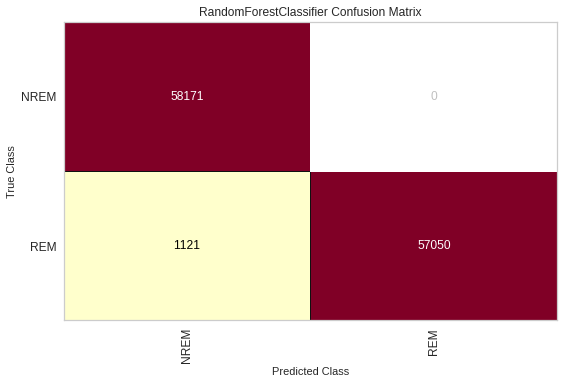

In [15]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_train, y_train)
cm.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


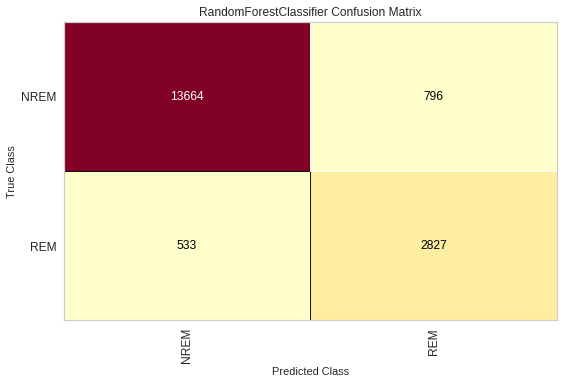

In [16]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

#Xg Boost

In [17]:
import xgboost as xgb
xgb =  load_model("/content/drive/MyDrive/MLModel_NREM_REM/XGBClassifier(max_depth=29, n_estimators=4010)")



In [18]:
y_pred_test = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[14037   423]
 [  594  2766]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14460
           1       0.87      0.82      0.84      3360

    accuracy                           0.94     17820
   macro avg       0.91      0.90      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.942929292929293


In [19]:
y_pred_train = xgb.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [  620 57551]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58171
           1       1.00      0.99      0.99     58171

    accuracy                           0.99    116342
   macro avg       0.99      0.99      0.99    116342
weighted avg       0.99      0.99      0.99    116342

Accurecy:  0.9946708841175156


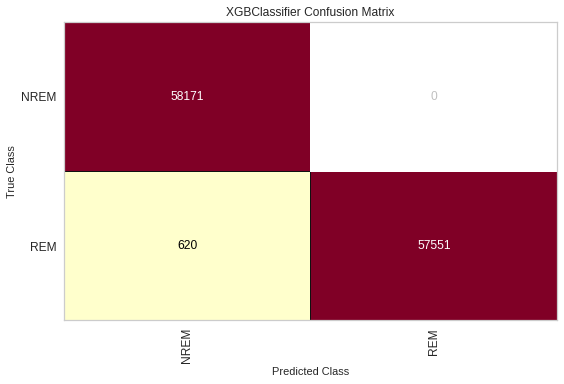

In [20]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_train, y_train)
cm.show()

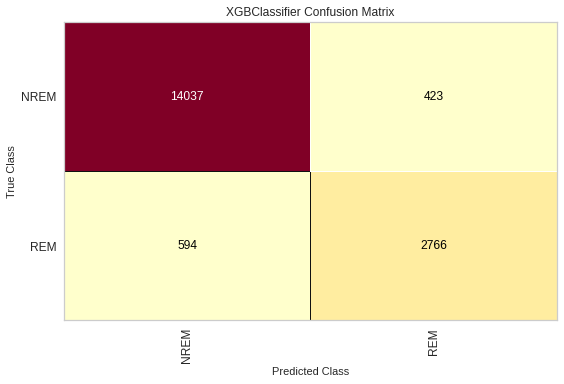

In [21]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

#Gradient Boost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb=load_model("/content/drive/MyDrive/MLModel_NREM_REM/GradientBoostingClassifier(max_depth=12, n_estimators=1150, random_state=0)")

In [23]:
y_pred_train=gb.predict(X_train)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))
print("Accurecy: ",accuracy_score(y_train, y_pred_train))

[[58171     0]
 [  638 57533]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     58171
           1       1.00      0.99      0.99     58171

    accuracy                           0.99    116342
   macro avg       0.99      0.99      0.99    116342
weighted avg       0.99      0.99      0.99    116342

Accurecy:  0.9945161678499596


In [24]:
y_pred_test=gb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))
print("Accurecy: ",accuracy_score(y_test, y_pred_test))

[[14032   428]
 [  596  2764]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14460
           1       0.87      0.82      0.84      3360

    accuracy                           0.94     17820
   macro avg       0.91      0.90      0.90     17820
weighted avg       0.94      0.94      0.94     17820

Accurecy:  0.9425364758698092


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


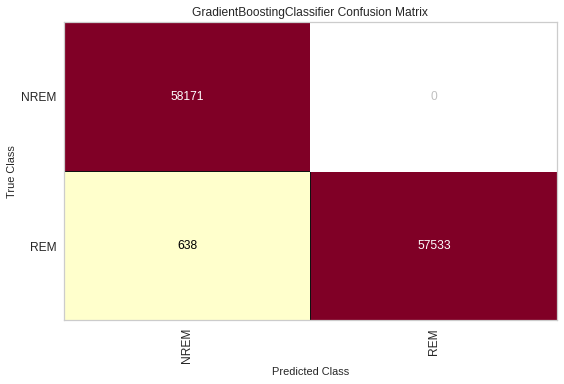

In [25]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(gb, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_train, y_train)
cm.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"


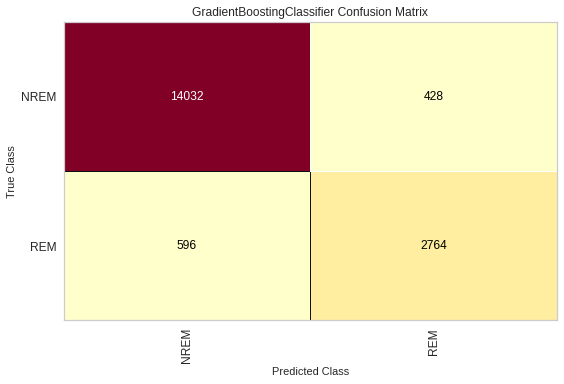

In [26]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(gb, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

#ROC

In [29]:
def ROC(mod,model_name,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=model_name[i]+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title(graph_feat["Title"],fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

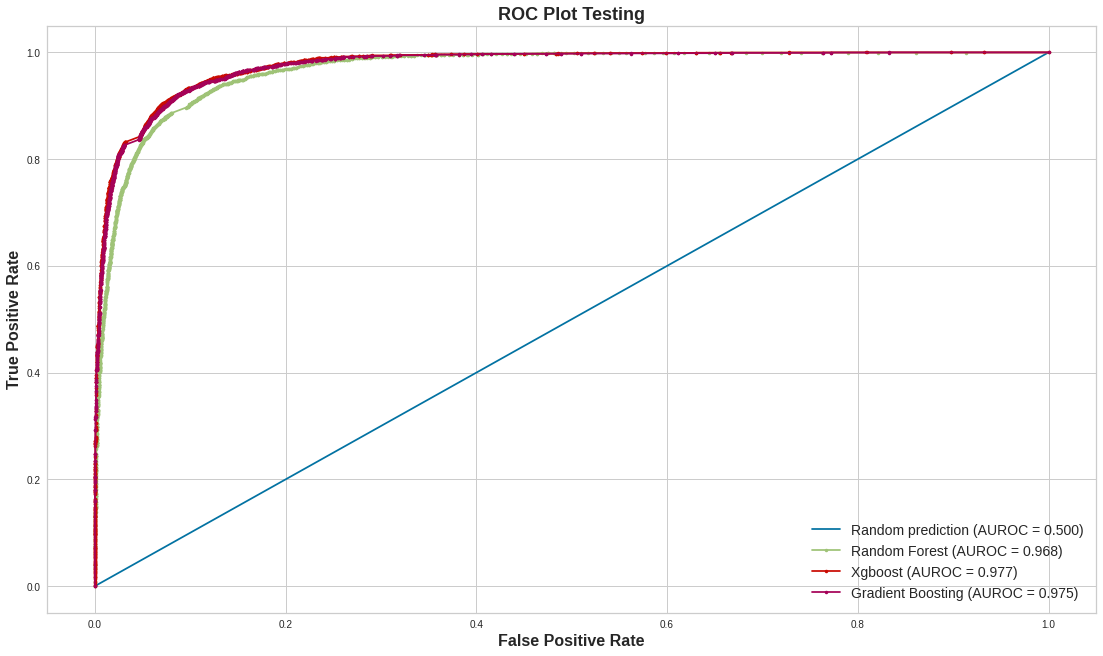

In [30]:
graph_feat={
    "Title" : "ROC Plot Testing",
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100
    

}

mod=[rf,xgb,gb]
model_name=["Random Forest","Xgboost","Gradient Boosting"]


ROC(mod,model_name,X_test,y_test,graph_feat)

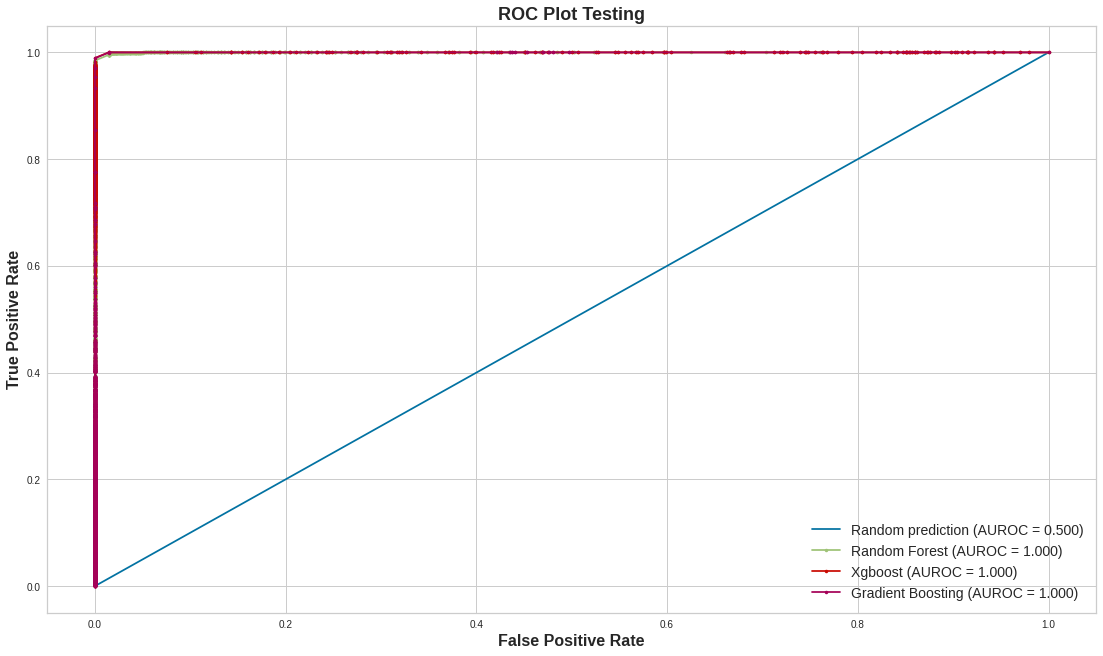

In [31]:
ROC(mod,model_name,X_train,y_train,graph_feat)